# Analysis of flagged purification policies

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn
from scipy.optimize import fsolve

import main_1GnB as main

---
---
## AF plot

In [2]:
n = 10

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = np.linspace(0,1,50)
pur_after_swap = False

# NOISE
Gamma = 0.02

# CONS
p_cons = 0.1

# Experiment
policy_names = ['DEJMPS + Repl.', 'DEJMPS + Repl. (flagged)']
varying_param = 'q_purif'
savefig = False

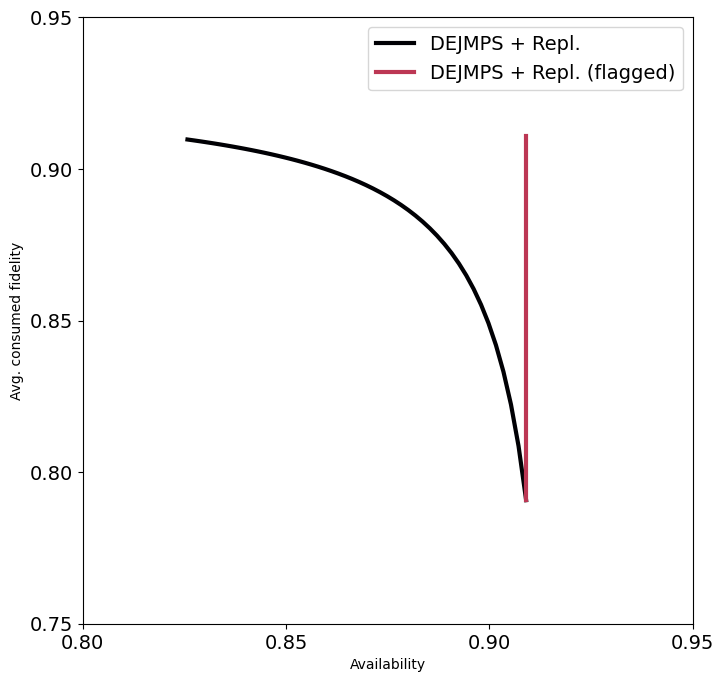

In [3]:
imp.reload(main)

main.AFplot_theory(varying_param, n, p_gen, rho_new, q_purif, policy_names,
                      pur_after_swap, Gamma, p_cons, savefig=False, xlims=None, ylims=None)

In [4]:
main.AFplot_interactive(policy_names)

interactive(children=(IntSlider(value=1, description='n', layout=Layout(width='60%'), max=15, min=1), FloatSli…

---
---
## Difference in max F ($q=1$) and A

In [5]:
n = 2

# GEN
p_gen = 1
F_new = 0.7
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = 1
pur_after_swap = False

# NOISE
Gamma = 0.01

# CONS
p_cons = 0.1

# Experiment
policy_names = ['DEJMPS + Repl.', 'DEJMPS + Repl. (flagged)']
#varying_param = 'F_new'
#varying_array = np.linspace(0.5,1,50)
varying_param = 'Gamma'
varying_array = np.logspace(-3,1,50)
colors = ['k', 'tab:orange']
linestyles = ['-', '--']
savefig = True

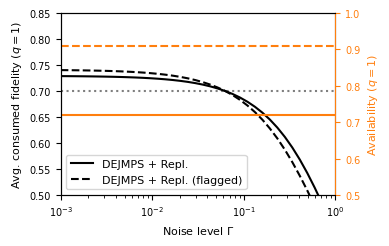

In [6]:
## THEORY ##

imp.reload(main)

Fcons_vecs = [[None for _ in varying_array] for policy in policy_names]
A_vecs = [[None for _ in varying_array] for policy in policy_names]

for idx_policy, policy_name in enumerate(policy_names):
    purif_policy = main.policy_label_to_function(policy_name)
    
    for idx_varying, varying_value in enumerate(varying_array):
        if varying_param=='Gamma':
            Gamma = varying_value
        elif varying_param=='F_new':
            F_new = varying_value
            rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])
        else:
            raise ValueError('Unknown varying_param')
    
        A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif,
                                                      purif_policy, pur_after_swap, Gamma, p_cons)
        Fcons_vecs[idx_policy][idx_varying] = Fcons
        A_vecs[idx_policy][idx_varying] = A


## PLOT ##
xfig = 9 # cm
yfig = 6 # cm
fontsize_labels = 8

# Plot
fig, ax1 = plt.subplots(figsize=(xfig/2.54, yfig/2.54))
ax2 = ax1.twinx()

for idx_policy, policy_name in enumerate(policy_names):
    ax1.plot(varying_array, Fcons_vecs[idx_policy], linestyle=linestyles[idx_policy],
             color=colors[0], label=policy_name)
if varying_param=='Gamma':
    ax1.plot([varying_array[0], varying_array[-1]], [F_new,F_new], linestyle=':', color=colors[0], alpha=0.5)
elif varying_param=='F_new':
    ax1.plot([0,1], [0,1], linestyle=':', color=colors[0], alpha=0.5)
    
for idx_policy, policy_name in enumerate(policy_names):
    ax2.plot(varying_array, A_vecs[idx_policy], linestyle=linestyles[idx_policy],
             color=colors[1], label=policy_name)

# Plot specs
ax1.set_xlim([varying_array[0],1])#varying_array[-1]])
ax1.set_ylim([0.5,0.85])
ax2.set_ylim([0.5,1])
if varying_param=='Gamma':
    ax2.set_xscale('log')
if varying_param=='Gamma':
    ax1.set_xlabel(r'Noise level $\Gamma$', fontsize=fontsize_labels)
elif varying_param=='F_new':
    ax1.set_xlabel(r'Fidelity of new links $F_\mathrm{new}$', fontsize=fontsize_labels)
else:
    raise ValueError('Unknown varying_param')
ax1.set_ylabel(r'Avg. consumed fidelity ($q=1$)', fontsize=fontsize_labels)
ax2.set_ylabel(r'Availability ($q=1$)', color=colors[1], fontsize=fontsize_labels)
ax1.tick_params(labelsize=fontsize_labels-1)
ax2.spines['right'].set_color(colors[1]) # Axis
ax2.tick_params(axis='y', which='both', colors=colors[1], labelsize=fontsize_labels-1) # Ticks

ax1.legend(loc='lower left', fontsize=fontsize_labels)

if savefig:
    if varying_param=='Gamma':
        filename = 'figs/flags-q%.3f-n%d-pg%.3f-Fnew%.3f-pc%.3f.pdf'%(q_purif,
                    n, p_gen, F_new, p_cons)
    elif varying_param=='F_new':
        filename = 'figs/flags-q%.3f-n%d-pg%.3f-Gamma%.3f-pc%.3f.pdf'%(q_purif,
                    n, p_gen, Gamma, p_cons)
    else:
        raise ValueError('Unknown varying_param')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()

---
---
## Probability of success and jump function

In [7]:
policy_names = ['DEJMPS + Repl.', 'DEJMPS + Repl. (flagged)']

main.policies_plot_interactive(policy_names)

interactive(children=(IntSlider(value=1, description='num_new_links', layout=Layout(width='60%'), max=15, min=…